In [25]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [26]:
#loading the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [28]:
#inspect the data
X.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957


In [29]:
#drop stab column
X.drop('stab', axis=1, inplace=True)

In [30]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =  sc_X.transform(X_test)

In [32]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
Forest_classifier = RandomForestClassifier(random_state=1)
Forest_classifier.fit(X_train, y_train)
y_pred = Forest_classifier.predict(X_test)

In [33]:
#View Model Performance 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
print('Accuracy of Random Forest Classifier: {}'.format(round(metrics.accuracy_score(y_test, y_pred),4)))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000

Accuracy of Random Forest Classifier: 0.929


In [34]:
#Extra Tree classifier
from sklearn.ensemble import ExtraTreesClassifier
Extra_Tree = ExtraTreesClassifier(random_state=1)
Extra_Tree.fit(X_train, y_train)
y_pred = Extra_Tree.predict(X_test)

In [35]:
#View model performance for extra tree
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
print('Accuracy of Extra Tree Classifier: {}'.format(round(metrics.accuracy_score(y_test, y_pred),4)))

              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000

Accuracy of Extra Tree Classifier: 0.928


In [36]:
#XGBOOST
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [37]:
#View model performance for XGBOOST
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
print('Accuracy of XGBOOST Classifier: {}'.format(round(metrics.accuracy_score(y_test, y_pred),4)))

              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000

Accuracy of XGBOOST Classifier: 0.9195


In [38]:
#Lightgbm
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

In [39]:
#View model performance for lightgbm
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
print('Accuracy of lightgbm Classifier: {}'.format(round(metrics.accuracy_score(y_test, y_pred),4)))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000

Accuracy of lightgbm Classifier: 0.9375


RandomCV search for Extra Tree Classifier

In [40]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

Extra_Tree2 = ExtraTreesClassifier(random_state=1)
classifier = RandomizedSearchCV(Extra_Tree2, hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state=1)
random_search = classifier.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


In [42]:
random_search.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

Training an Extra Tree Clssifier with the optimal new parameters

In [44]:
Extra_Tree2 = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                 min_samples_leaf=8, max_features=None, random_state=1)
Extra_Tree2.fit(X_train, y_train)
y_pred = tuned_tree.predict(X_test)

In [45]:
#Model performance for tuned Extra Tree Classifier
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
print('Accuracy of Tuned Extra Tree Classifier: {}'.format(round(metrics.accuracy_score(y_test, y_pred),4)))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000

Accuracy of Tuned Extra Tree Classifier: 0.927


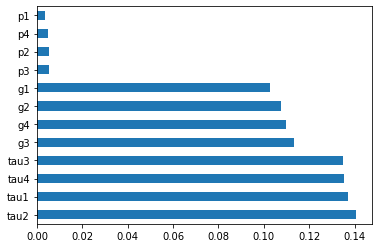

In [47]:
feature_importance = pd.Series(tuned_tree.feature_importances_, index=X.columns)
feature_importance.nlargest(40).plot(kind='barh')
plt.show()